# Week 6


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/final_dataset.csv')
df.head(7)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Need Attention,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late teens,Male,2.97,No harm,TV,Wallmounted,>30,False,0.48,No health impacts,No Impact,Rural


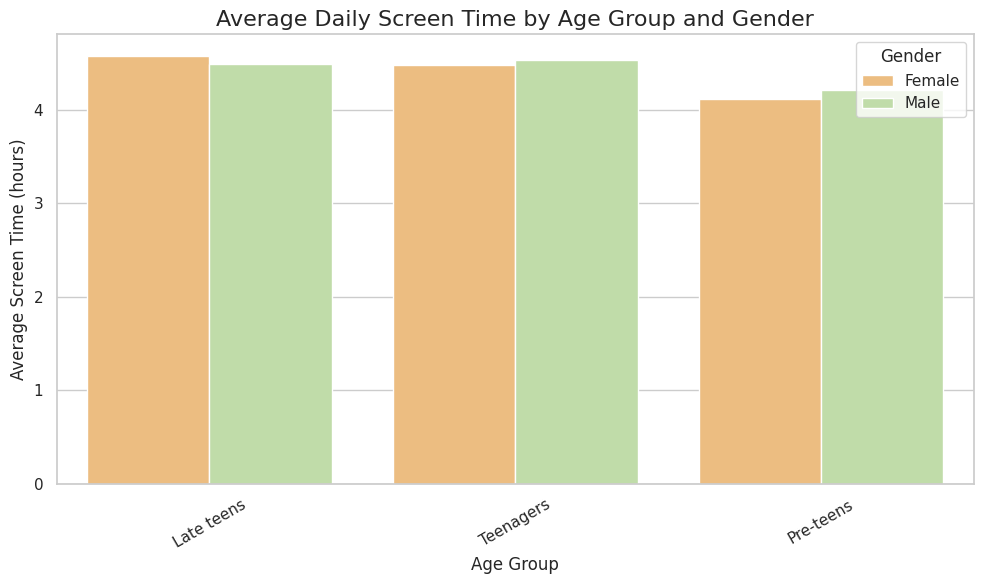

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
file_path =('/content/final_dataset.csv')
df= pd.read_csv(file_path)

# Group and summarize data
summary = (
    data
    .groupby(['Age_Group', 'Gender'], as_index=False)
    .agg(avg_screen_time=('Avg_Daily_Screen_Time_hr', 'mean'),
         sample_size=('Avg_Daily_Screen_Time_hr', 'size'))
    .sort_values(by='avg_screen_time', ascending=False)
)

# Set plot style
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Create barplot
bar = sns.barplot(
    data=summary,
    x='Age_Group',
    y='avg_screen_time',
    hue='Gender',
    palette='Spectral',
    ax=ax
)

# Customize plot
ax.set_title('Average Daily Screen Time by Age Group and Gender', fontsize=16)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Average Screen Time (hours)', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


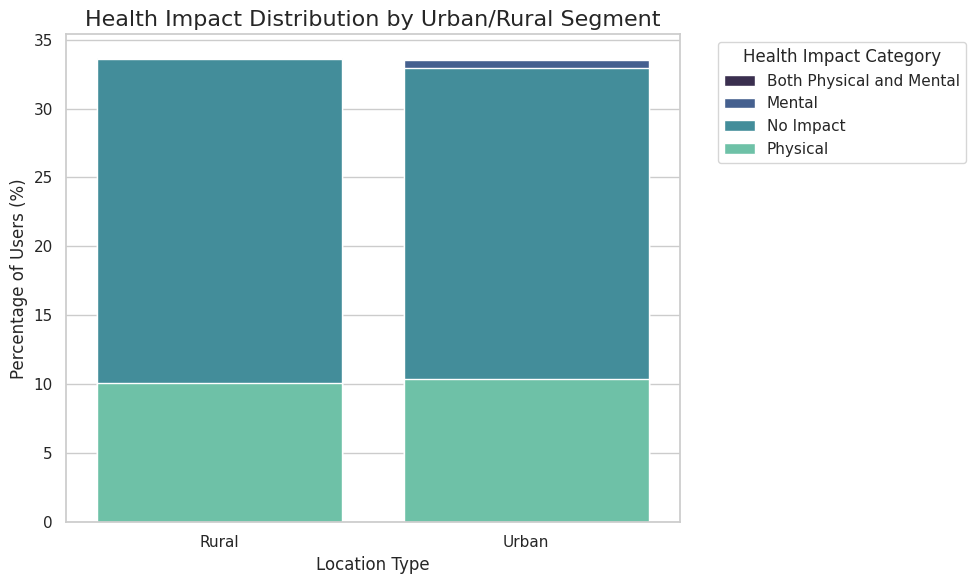

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
health_pct = pd.crosstab(df['Urban_or_Rural'], df['Health_Impact_Category'], normalize='index') * 100
health_pct = health_pct.reset_index().melt(id_vars='Urban_or_Rural', var_name='Health_Impact_Category', value_name='Percentage')

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create stacked barplot using hue and dodge=False
sns.barplot(
    data=health_pct,
    x='Urban_or_Rural',
    y='Percentage',
    hue='Health_Impact_Category',
    palette='mako',
    dodge=False
)

# Customize plot
plt.title("Health Impact Distribution by Urban/Rural Segment", fontsize=16)
plt.xlabel("Location Type", fontsize=12)
plt.ylabel("Percentage of Users (%)", fontsize=12)
plt.legend(title="Health Impact Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


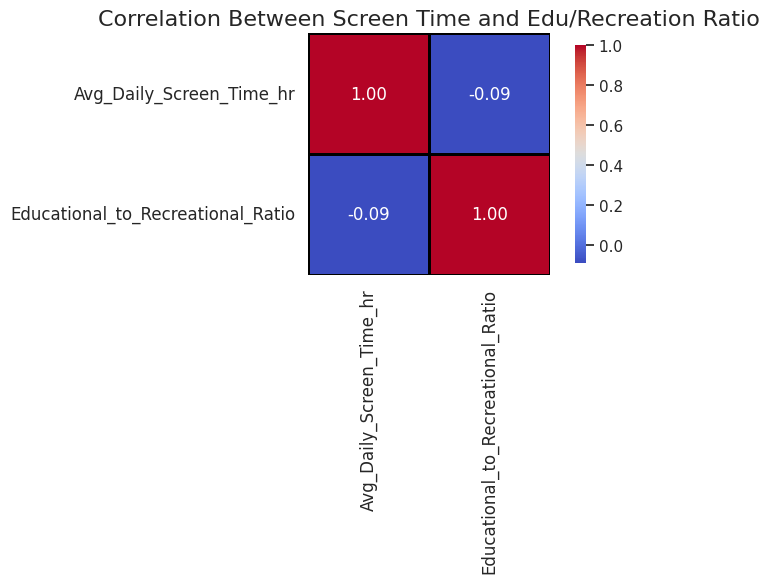

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
selected_cols = ['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
correlation_matrix = df[selected_cols].corr()

# Set plot style
sns.set_theme(style='white')
plt.figure(figsize=(8, 6))  # Increased figure size

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=1,
    linecolor='black',
    square=True,
    cbar_kws={'shrink': 0.9},
    annot_kws={"size": 12}  # Larger annotation text
)

# Customize plot
plt.title("Correlation Between Screen Time and Edu/Recreation Ratio", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


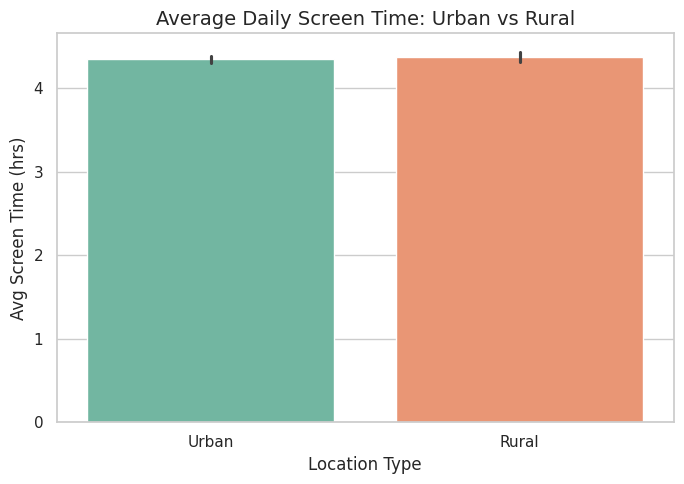

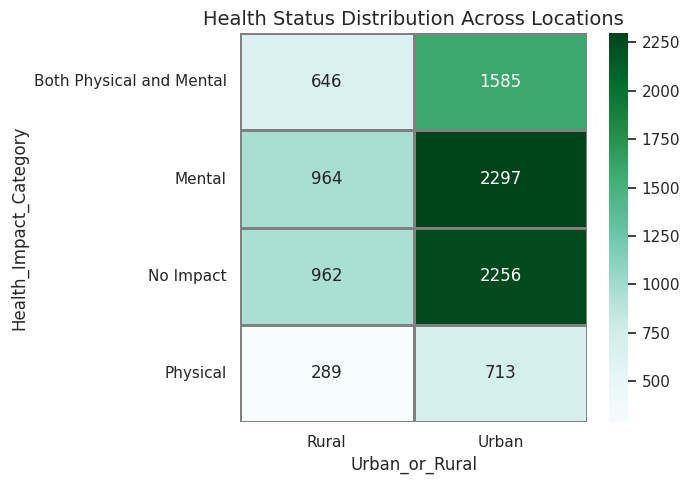

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual theme
sns.set_theme(style='whitegrid')

# Barplot: Average Screen Time by Location
fig, ax1 = plt.subplots(figsize=(7, 5))
sns.barplot(
    data=df,
    x='Urban_or_Rural',
    y='Avg_Daily_Screen_Time_hr',
    palette='Set2',
    ax=ax1
)
ax1.set_title("Average Daily Screen Time: Urban vs Rural", fontsize=14)
ax1.set_ylabel("Avg Screen Time (hrs)")
ax1.set_xlabel("Location Type")
plt.tight_layout()
plt.show()

# Heatmap: Health Status by Location
health_dist = pd.crosstab(df['Health_Impact_Category'], df['Urban_or_Rural'])

fig, ax2 = plt.subplots(figsize=(7, 5))
sns.heatmap(
    health_dist,
    annot=True,
    fmt='d',
    cmap='BuGn',
    linewidths=0.8,
    linecolor='gray',
    ax=ax2
)
ax2.set_title("Health Status Distribution Across Locations", fontsize=14)
plt.tight_layout()
plt.show()



# Segment & Seasonal Insights Summary
**High-Usage Cohorts**
Teenagers with TVs/Tablets and Late Teens with Laptops/Smartphones consistently top the charts in screen time, averaging over 4.5 hours daily.

These device-age combinations stand out as the most intensive usage groups across all segments.

**Urban vs  Rural Divide**
Urban children have significantly greater access to both portable and wall-mounted devices.

For example, urban portable device usage exceeds 5,000 units, while rural usage remains below 2,000—highlighting a stark accessibility gap.

**Health Impact Trends**
Both genders report mental health impacts most frequently, followed by combined physical and mental effects.

Males show a slightly higher tendency to report dual-impact symptoms, suggesting nuanced gender differences in screen-related health outcomes.

**Awareness & Concern Patterns**
Teens and pre-teens dominate the "Need Attention" and "Moderate Concern" categories.

These age groups also exceed recommended screen time more often than others, indicating a need for targeted awareness campaigns.

**Outlier Behavior**
Violin plots reveal extreme usage among certain subgroups—especially those flagged as "Critical Concern" or "High Concern".

Some users in these categories reach 12–14 hours of daily screen time, particularly on smartphones and TVs.

**Segment-Specific Risk Mapping**
Heatmaps show that risk is tied to specific age-device combinations, not just age or device alone.

Notable examples include Pre-teens with Laptops and Teenagers with Tablets, both averaging around 4.45 hours/day.

**Demographic Distribution**
Urban pre-teens form the largest user base, especially in terms of screen exposure.

Rural users show limited access, suggesting that interventions should balance urban overuse with rural inclusion and education.

**Habit & Calendar Effects**
Screen time spikes on weekends and holidays, regardless of age or device.

While monthly trends remain stable, Saturday/Sunday usage surges across all groups—ideal windows for awareness efforts.

**Cohort-Level Takeaways**
The most vulnerable segments are urban teens using TVs/tablets and late teens on laptops/smartphones.

Health and awareness concerns are concentrated in younger cohorts, reinforcing the need for digital wellness programs.

Urban-rural differences are more about device variety and access than screen time itself.

Academic terms may influence device preferences, but high usage persists year-round for at-risk groups.